# **Job Recommendation System**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [49]:
df = pd.read_csv('/kaggle/input/job-description-dataset/job_descriptions.csv')

In [50]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [51]:
df.shape

(1615940, 23)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [53]:
df.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [54]:
df.describe()

,Job Id,latitude,longitude,Company Size
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,1.937743e+01,1.639926e+01,7.370467e+04
std,8.946722e+14,2.355690e+01,7.066762e+01,3.529886e+04
min,1.817948e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.740508e+14,5.152100e+00,-1.531010e+01,4.311400e+04
50%,1.547858e+15,1.807080e+01,1.914510e+01,7.363300e+04
75%,2.323729e+15,3.907420e+01,4.757690e+01,1.043000e+05
max,3.099618e+15,7.170690e+01,1.780650e+02,1.348340e+05


## EDA

In [55]:
# Convert 'Job Posting Date' to datetime (unparseable dates become NaT)
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')

# Create a new column for Year-Month for temporal grouping
df['YearMonth'] = df['Job Posting Date'].dt.to_period('M').astype(str)

# Check the conversion result
df[['Job Posting Date', 'YearMonth']].head()

,Job Posting Date,YearMonth
0,2022-04-24,2022-04
1,2022-12-19,2022-12
2,2022-09-14,2022-09
3,2023-02-25,2023-02
4,2022-10-11,2022-10


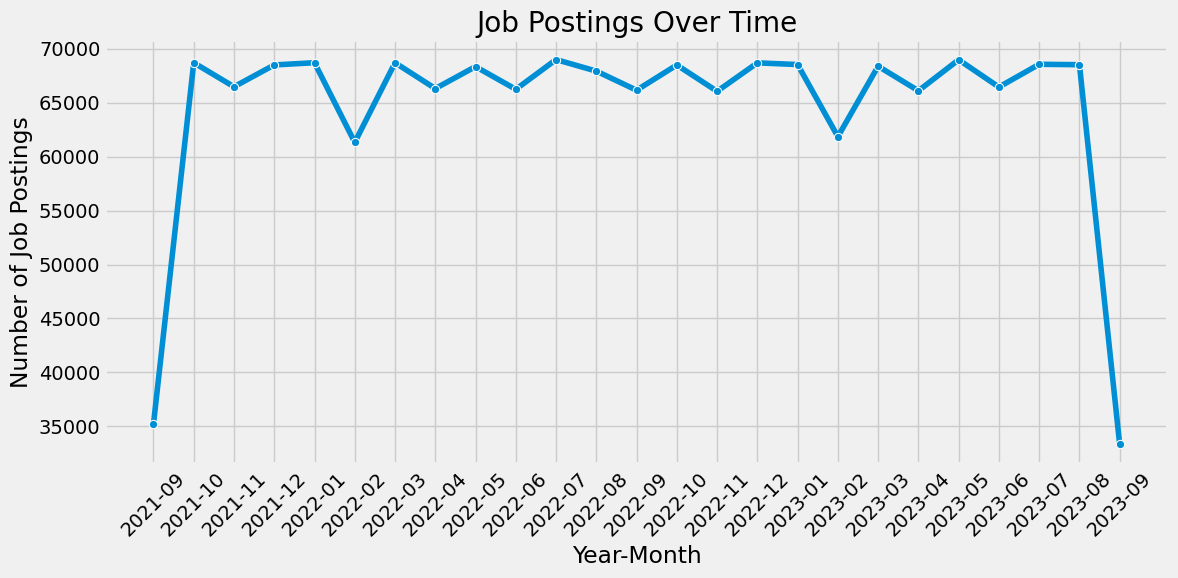

In [56]:
# Group by YearMonth and count the number of job postings
job_postings_over_time = df.groupby('YearMonth').size().reset_index(name='Count')

# Plot the trend over time using Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(data=job_postings_over_time, x='YearMonth', y='Count', marker='o')
plt.xticks(rotation=45)
plt.title("Job Postings Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()


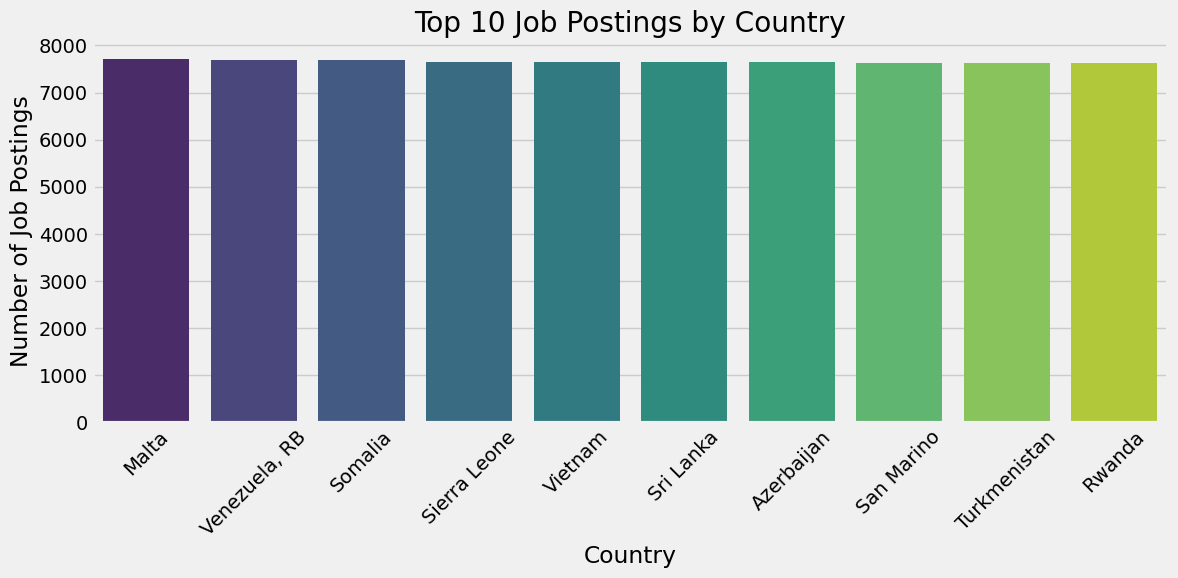

In [57]:
# Count job postings by country and get the top 10
country_counts = df['Country'].value_counts().sort_values(ascending=False).head(10).reset_index()
country_counts.columns = ['Country', 'Count']

# Plot the distribution by Country
plt.figure(figsize=(12,6))
sns.barplot(data=country_counts, x='Country', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Job Postings by Country")
plt.xlabel("Country")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()


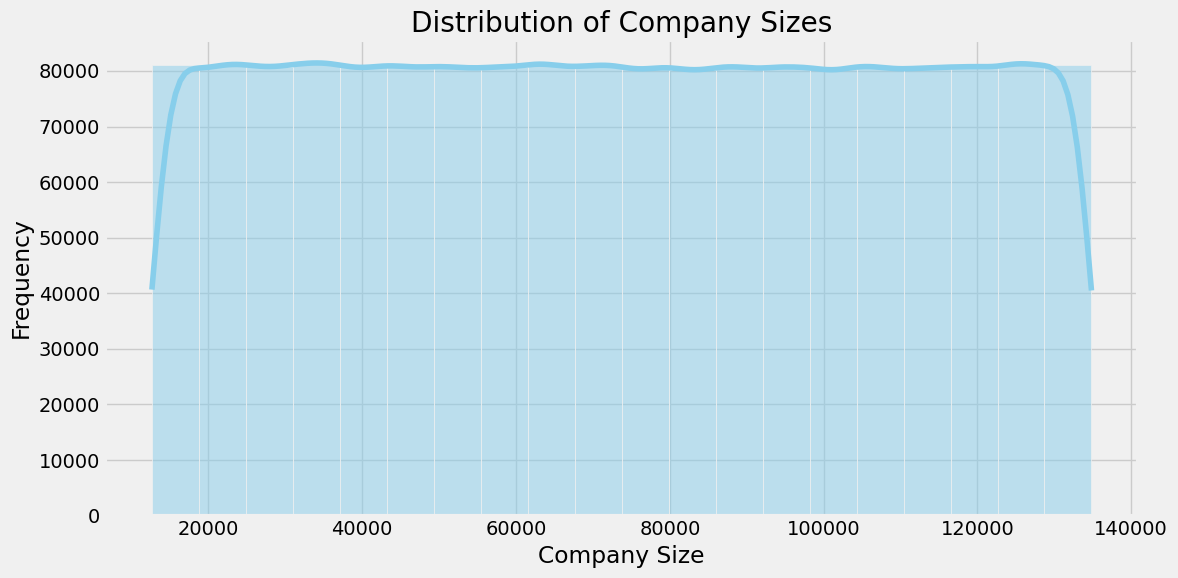

In [64]:
# Plot the distribution of Company Size
plt.figure(figsize=(12,6))
sns.histplot(df['Company Size'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Company Sizes")
plt.xlabel("Company Size")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


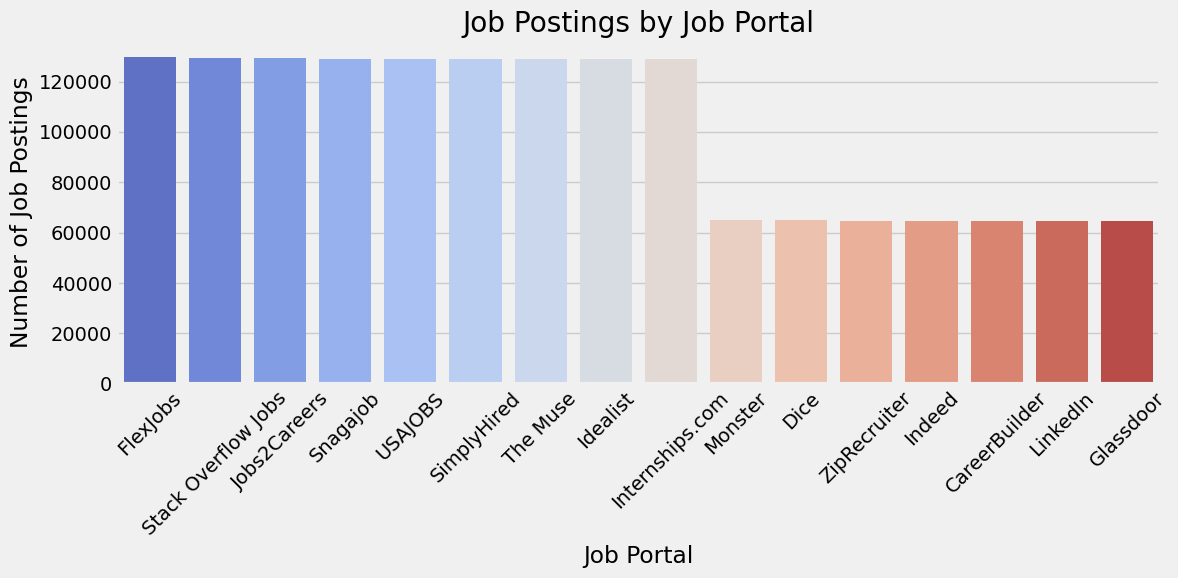

In [65]:
# Count postings by Job Portal
job_portal_counts = df['Job Portal'].value_counts().reset_index()
job_portal_counts.columns = ['Job Portal', 'Count']

# Plot job postings by portal
plt.figure(figsize=(12,6))
sns.barplot(data=job_portal_counts, x='Job Portal', y='Count', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Job Postings by Job Portal")
plt.xlabel("Job Portal")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()


Unique Experience values: ['5 to 15 Years' '2 to 12 Years' '0 to 12 Years' '4 to 11 Years'
 '1 to 12 Years' '4 to 12 Years' '3 to 15 Years' '2 to 8 Years'
 '2 to 9 Years' '1 to 10 Years' '3 to 10 Years' '1 to 8 Years'
 '1 to 9 Years' '5 to 14 Years' '0 to 11 Years' '3 to 12 Years'
 '5 to 9 Years' '0 to 15 Years' '0 to 10 Years' '2 to 14 Years'
 '3 to 9 Years' '4 to 15 Years' '2 to 10 Years' '4 to 8 Years'
 '3 to 8 Years' '1 to 14 Years' '1 to 13 Years' '0 to 8 Years'
 '5 to 10 Years' '2 to 13 Years' '4 to 9 Years' '1 to 15 Years'
 '4 to 10 Years' '5 to 12 Years' '0 to 13 Years' '4 to 14 Years'
 '1 to 11 Years' '4 to 13 Years' '0 to 9 Years' '5 to 8 Years'
 '2 to 15 Years' '5 to 13 Years' '5 to 11 Years' '0 to 14 Years'
 '3 to 13 Years' '2 to 11 Years' '3 to 11 Years' '3 to 14 Years']


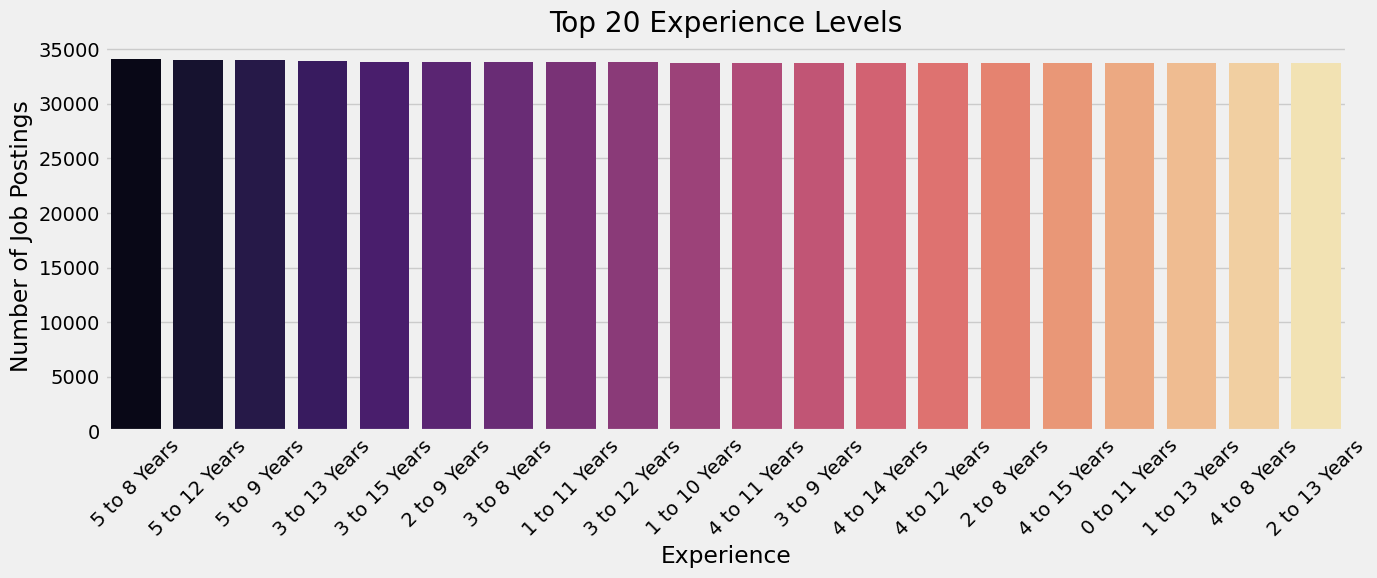

In [66]:
# Examine unique values in the Experience column
print("Unique Experience values:", df['Experience'].unique())

# Plot the distribution of the top 20 Experience levels
plt.figure(figsize=(14,6))
experience_counts = df['Experience'].value_counts().head(20).reset_index()
experience_counts.columns = ['Experience', 'Count']
sns.barplot(data=experience_counts, x='Experience', y='Count', palette='magma')
plt.xticks(rotation=45)
plt.title("Top 20 Experience Levels")
plt.xlabel("Experience")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()


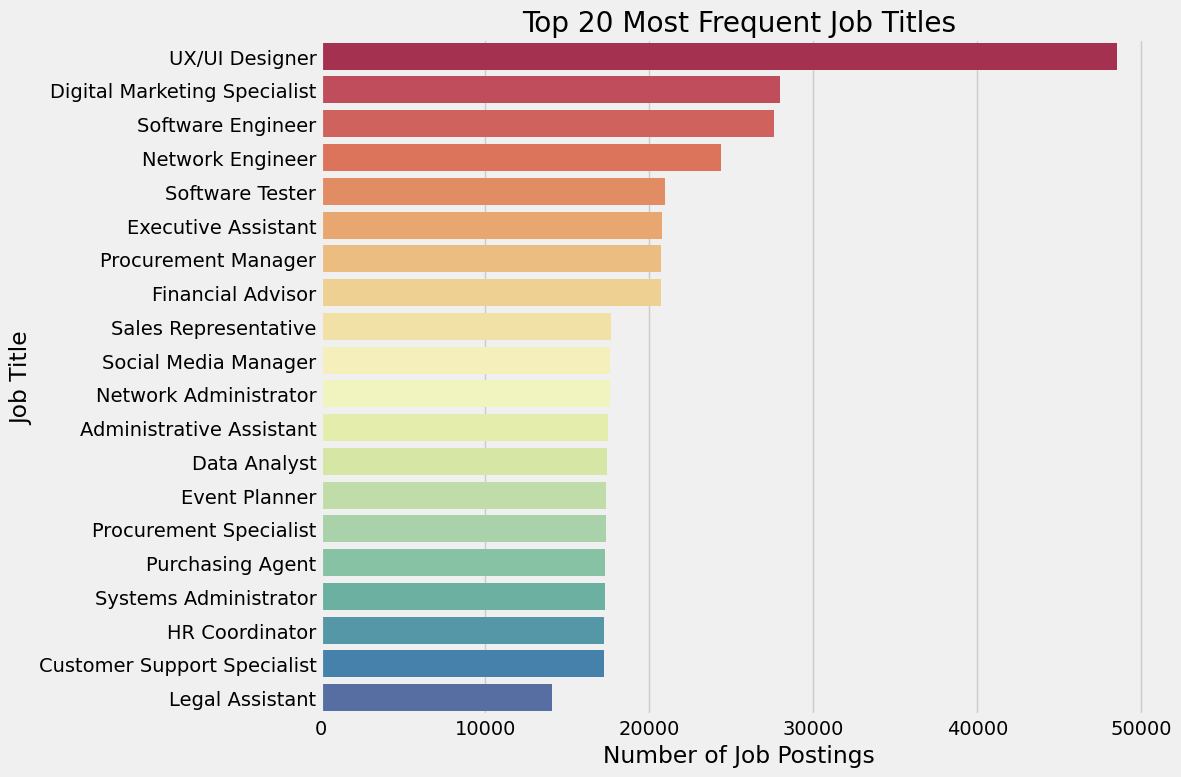

In [61]:
# Count and select top 20 most frequent job titles
top_job_titles = df['Job Title'].value_counts().nlargest(20).reset_index()
top_job_titles.columns = ['Job Title', 'Count']

# Plot the top 20 job titles
plt.figure(figsize=(12,8))
sns.barplot(data=top_job_titles, x='Count', y='Job Title', palette='Spectral')
plt.title("Top 20 Most Frequent Job Titles")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


# **Job Recommendation System**

In [68]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assume df is your dataframe already loaded.
# For demonstration, ensure that the 'Job Title' column is a string.
df['Job Title'] = df['Job Title'].astype(str)


In [69]:
df['Job Title'].nunique()

147

In [88]:
df['Role'].nunique()

376

In [106]:
# Keep only unique job titles
df_unique_titles = df[['Job Title']].drop_duplicates()
df_unique_titles
# Reset the index of df_unique_titles
df_unique_titles = df_unique_titles.reset_index(drop=True)


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize job titles
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_unique_titles ['Job Title'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)



In [109]:
def recommend_jobs(job_title, cosine_sim=cosine_sim, df=df_unique_titles):
    # Get the index of the job title that matches the input
    indices = pd.Series(df.index, index=df['Job Title']).drop_duplicates()
    
    if job_title not in indices:
        return "Job title not found!"
    
    idx = indices[job_title]
    
    # Get the similarity scores for this job title
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the jobs by similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar jobs (excluding itself)
    top_jobs = sim_scores[1:6]
    
    # Return the top 5 similar job titles
    job_indices = [i[0] for i in top_jobs]
    return df.iloc[job_indices]['Job Title'].tolist()


In [111]:

# Ask the user for input
user_input = input("Type the job title you want recommendations for: ")

# Get recommendations
recommendations = recommend_jobs(user_input)

# Display results
if isinstance(recommendations, str):  # In case the job title is not found
    print(recommendations)
else:
    print(f"Jobs similar to '{user_input}':")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

Type the job title you want recommendations for:  Data Analyst


Jobs similar to 'Data Analyst':
1. Data Engineer
2. Data Scientist
3. Data Entry Clerk
4. Marketing Analyst
5. Network Analyst


### Conclusion:

Building a recommendation system for job roles using cosine similarity has provided a practical way to explore connections between different roles based on their textual descriptions. This approach is not only versatile but also efficient, allowing users to discover similar roles with just a few clicks or inputs.

By leveraging a robust pipeline — starting with preprocessing, vectorizing the role data, computing cosine similarity, and providing a user-friendly input/output interface — the system empowers users to navigate the job market intelligently. For example:

1. **Professionals** can explore alternate career paths or identify complementary roles.
2. **Recruiters** can use it to suggest roles that match candidate profiles.
3. **Job Seekers** can broaden their searches by finding roles they might not have considered initially.

This project demonstrates the power of natural language processing (NLP) techniques and vectorized similarity metrics in solving real-world problems. By refining it further — such as integrating additional features like skills, experience, or company size — the recommendation system could become even more personalized and insightful.

Feel free to enhance the model further or integrate it into a job portal for greater accessibility! 🚀